<a href="https://colab.research.google.com/github/Mariana-MarquezA/Seattle-Weather/blob/main/Seattle_vs_St_Louis_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The main purpose of this notebook is to produce a clean version of the data provided, which is two data sets containing daily weather information from Seattle and St. Louis. We will first examine the data and make a quick assessment of its suitability to address the question concerning the comparative rainfall levels between Seattle and St. Louis. Once we determined that the data is useful, we will procede to rename variables, join the Seattle and the St. Louis data sets, handle missing values and transform the dataframe into tidy or long format.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import files
sns.set_theme(style='whitegrid')

## Data loading

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

In [2]:
# Load the Seattle data set
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

In [3]:
# Load the St. Louis data set
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Content exploration of the data sets

This section explores the data sets separately and looks at some of their characteristics. Different methods such as `head` and `info` will be used.

By looking at the head of each data frame, we are able to see the names of the columns and a few example values for each column.

The `info` method checks the data type, shape of the data frame, and number of missing missing values.

In addition, we can consult the [data documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) to obtain more information of the variables.

### Seattle data set exploration

In [4]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In the above table, we can observe that the data set contains variables corresponding to station code, station name, date, and 7 climatological variables. In the example values, most of the climatological variables appear to be empty. After checking the [data documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf), we can know that 'PRCP' is the daily precipitation measured in inches. 'PRCP' is the variable of interest for addressing our research question. So far, it appears that the Seattle data set will be useful.

It may be relevant to notice that the data set seems to be ordered by date in the format m/d/yy. 


In [5]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


The `info` method helps us verify that all climatological variables, except 'PRCP', are mostly empty. Those variables are outside of our scope, thus their missing values do not represent a problem. However, 'PRCP', precipitation, has 22 missing values. We will need to decide the best way to manage or impute them.

In terms of data types, it is important to notice that 'DATE' is an object type. We will need to convert it to `datetime`.

### St. Louis data set exploration

In [6]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


From the head of the data frame, the St. Louis data set appears to have similar content. However, the columns are not entirely the same, The Seattle data set has 2 extra columns: 'WESD' and 'WESF'. The method `columns` can be used to verify it. 

The extra columns are not a primary concern because our focus is on 'DATE' and 'PRCP' columns from each data set.

In [7]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [8]:
df_stlouis.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

Additionally, it is observable that the St. Louis data set contains data from 2017, which we do not need. The format of the date is different: yyyy/mm/dd. This is an important consideration because some data type convertion will probably be necessary to join and analyze the Seattle and the St. Louis data sets together.

In [9]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


Once again, 'DATE' is an object type that wil need to be converted. 

One striking observation is that the St. Louis data set contains many more observations than the Seattle data set. We already noted that the St. Louis data set contains values from 2017, but that would not account for the size of the data set.

**Why might the St. Louis data set be larger?**

Below the methods `nunique` and `value_counts` are used to show that the data sets include data from a different number of stations. The Seattle data set only reports data from 1 stations, while the St. Louis data set includes data from 44. 

With `value_counts`, we can have more detailed information and notice that the number of observations per station varies in the St. Louis data set. This is a sign of missing or omitted values.

In [10]:
df_seattle['STATION'].nunique()

1

In [11]:
df_stlouis['STATION'].nunique()

44

In [12]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

In [13]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

## Data types convertions

### Convert 'DATE' to datetime 

It is important to convert dates to `datetime` types (or `int`) before plotting the data, because when dates are strings or objects, a plot will show successive values next to each other without recognizing possible gaps in dates.

Convert the Seattle 'DATE' variable to datetime type.

In [14]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [15]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [16]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


Convert the St. Louis 'DATE' variable to datetime type.

In [17]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [18]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [19]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  54574 non-null  object        
 1   NAME     54574 non-null  object        
 2   DATE     54574 non-null  datetime64[ns]
 3   DAPR     1166 non-null   float64       
 4   MDPR     1163 non-null   float64       
 5   PRCP     53143 non-null  float64       
 6   SNOW     33167 non-null  float64       
 7   SNWD     12835 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 3.3+ MB


We can check both 'DATE' variables were properly corrected by using the `head` and `info` methods. In the example values we should be able to see that the date format is yyyy/mm/dd. We can directly check that the data type is datetime with `info`.

# Suitability of Data for Addressing the Question: Quick Exploratory Data Analysis

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

Our first step will be to plot the daily precipitation data for Seattle.

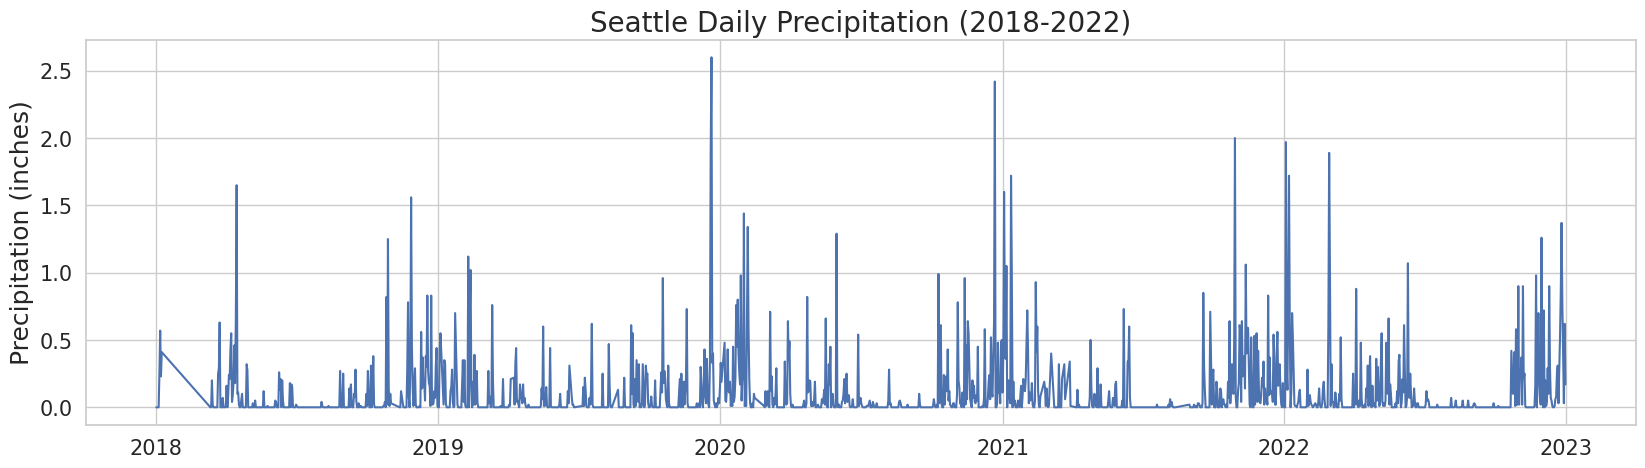

In [20]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('')
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Seattle Daily Precipitation (2018-2022)',fontsize=20)

plt.tick_params(labelsize=15);

At the beginning of 2018, the graph shows a vertical line. It is an unusual pattern if we look at the rest of the graph. Thus, it is an indication that there is likely a discontinuity, and the graphing method joined two points in the most direct way, which is a vertical line.

We can corroborate this by using the `head` method and displaying the first 30 rows. It will allow us to see where the discontinuity is.

In [21]:
df_seattle.head(30)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-12,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-13,NaN,NaN,0.00,NaN,NaN,NaN,NaN


From the table above, we can see that there is a discontinuity between the 7th and the 8th row. The 7th row corresponds to 2018-01-08. The 8th row skips to 2018-03-12. It means that all the dates in-between were omitted from the data set.

Although the Seattle data set is missing values, we can see that for the most part it seems to have the precipitation values that we need.

**Plot the daily precipitation data for St. Louis.**

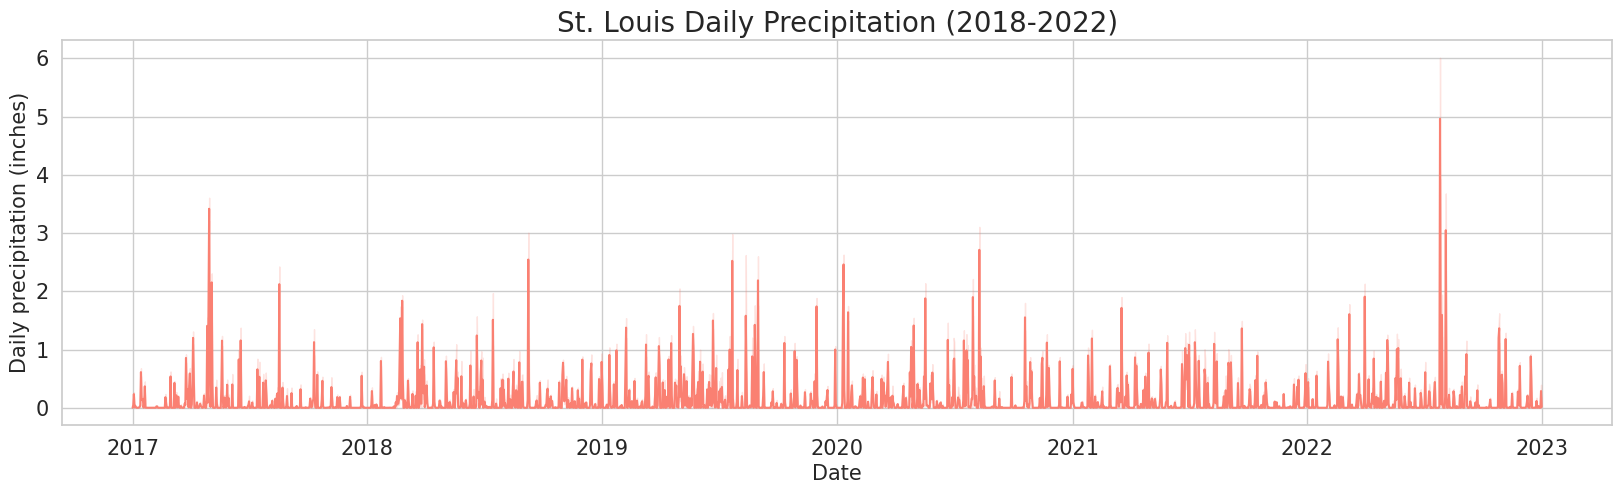

In [22]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP',color='salmon')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily precipitation (inches)', fontsize = 15)
plt.title('St. Louis Daily Precipitation (2018-2022)',fontsize=20)

plt.tick_params(labelsize=15);

Unlike the Seattle plot, this one does not show signs of ommitted values. One thing that is interesting is the spike in the second half of 2022. We need to keep it in mind as it is an outlier that will affect our calculations of means. 

# Selection of relevant subsets of the data

In [23]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


We saw that the St. Louis data set contains data prior to 2018. We need to limit the St. Louis data to 2018 and beyond.

In [24]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [25]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


In [26]:
df_stlouis['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

We also saw that the St. Louis data set was much larger than the Seattle data set. We can verify that the St. Louis data set has more rows or observations than the Seattle with `shape`. After excluding data prior to 2018, it becomes evident that the dataset for St. Louis is significantly larger in comparison

In [27]:
df_stlouis.shape

(45775, 8)

In [28]:
df_seattle.shape

(1658, 10)

In [29]:
df_stlouis['STATION'].nunique()

40

In [30]:
df_seattle['STATION'].nunique()

1

As we described above, the number of weather stations differs between the data sets. Even after removing 2017 data, St. Louis data set has values from 40 stations; while the Seattle data set has only one weather station. This accounts for the large difference in the number of observations of the data sets.

In order to correct this discrepancy, we will focus on the data from the airport in St. Louis. The reason is that weather stations are crucial for daily operations in airports; thus, it is highly probable that the data is of high quality and completeness.

In [31]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [32]:
df_stlouis['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

# Identifying and Handling Missing Values

Data can be missing in multiple manners:
1. Values are `NaN` in the data frame

In [33]:
df_seattle.head(2)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN


2.  Values are not included in the data set.

This section will identify and manage the two forms in which data can be missing in each of the data sets.

## St. Louis data set

By using the `.info()` method, we determine the number of non-null values in each column.

In [34]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


We can directly test if a value is null with the method `isna`. We can count the null values by calling `sum`.

In [35]:
df_stlouis.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

The St. Louis data set does not have any `NaN` values of `DATE` or `PRCP`. Now we can test if there are any ommitted data points.

In order to know if there are any ommitted points, we need to know how many data points there should be between 2018 and 2022. Since our observations are daily, the question we need to answer is: how many days are there in 5 year? We also need to consider that one of those years was a leap year.

Over 5 years there should be 

$$5 \times 365 + 1 = 1826$$

days. 

By looking above at the `info` summary, we can see that The St. Louis data set has 1826 entries. It is not missing any dates or precipitation values.

## Seattle data set

In [36]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


The Seattle data set is missing some dates and precipitation values. We could see this in the time series plot.

We can use the library `missingno` to visualize where values are missing.

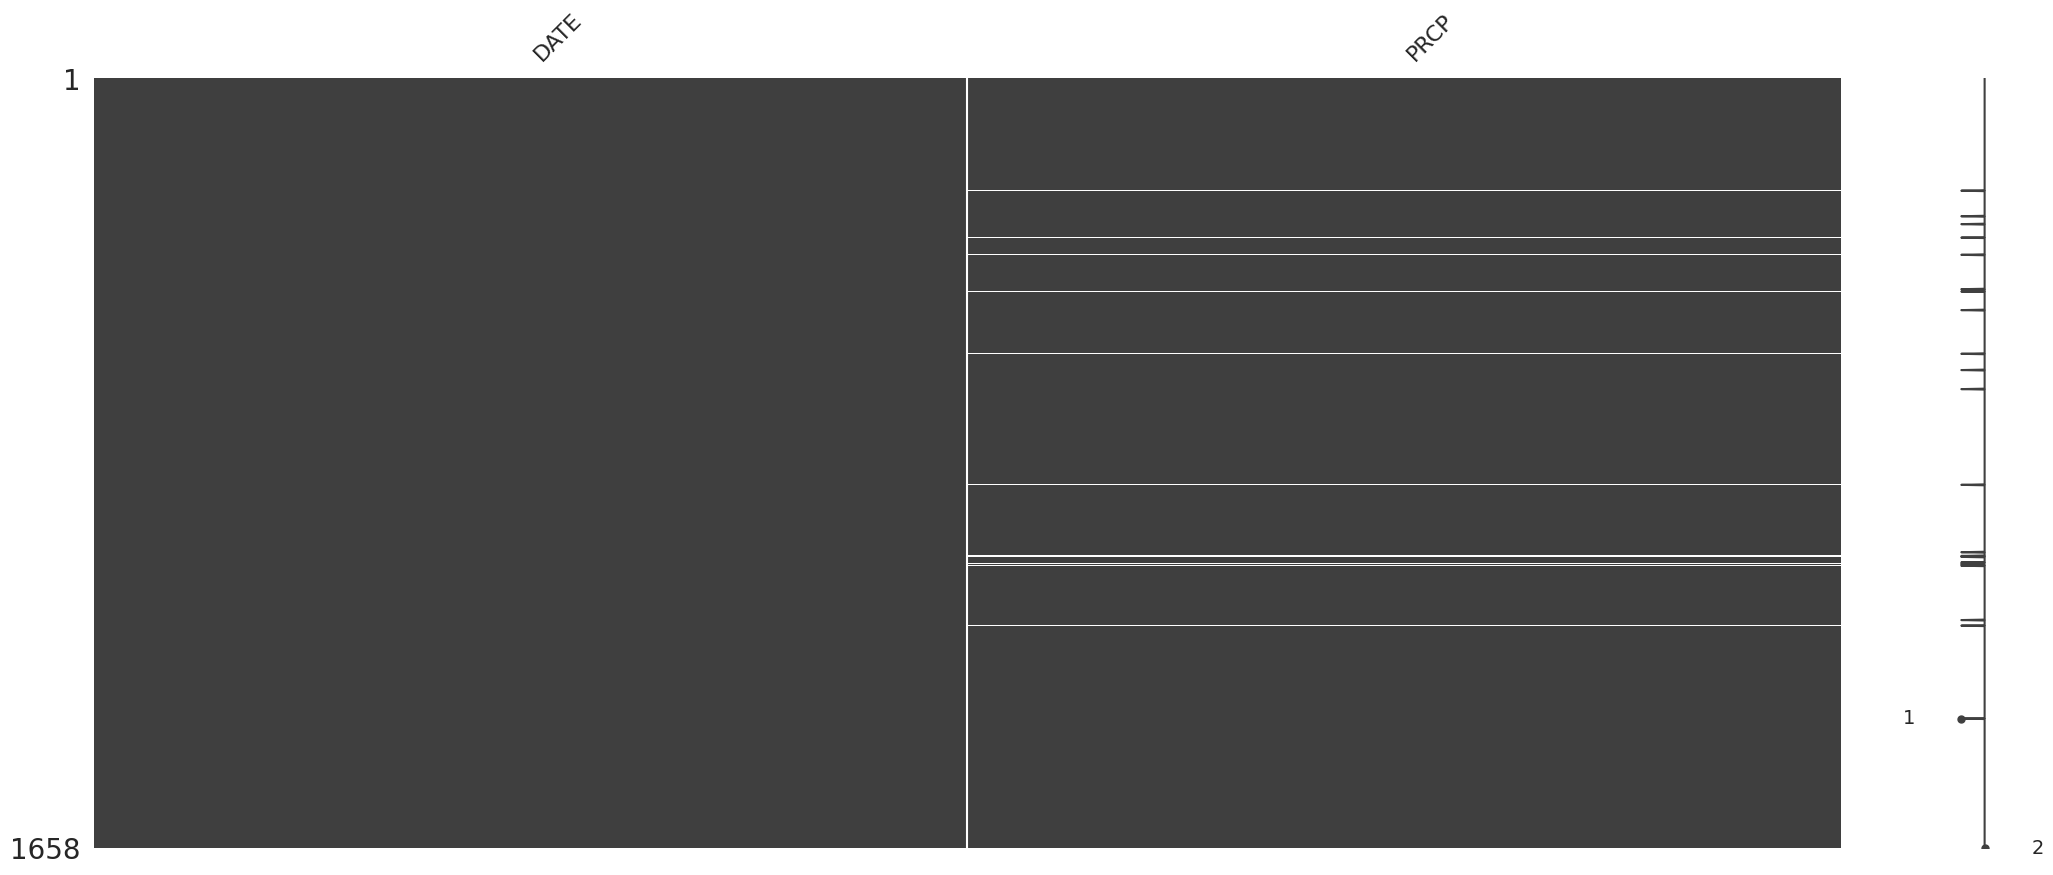

In [37]:
msno.matrix(df_seattle[['DATE','PRCP']]);

This is helpful, but we should note that this does not indicate where there are dates that are not present in the data set. We will return to this issue after joining the data sets because this will show the dates that are missing from the Seattle data set.

# Join data frames keeping 'DATE' and 'PRCP' columns

St. Louis has data for all dates between 2018 and 2022. We want to keep all the rows of the St. Louis data set and join the columns of the Seattlea data set according to 'DATE'.

We can use `merge`, set the St. Louis columns as the left dataframe, and do a left join.

In [38]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')

In [39]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


Each DataFrame had a column named `PRCP`, so the default is to add suffixes _x and _y to differentiate the columns. The DataFrame will be converted to a tidy format so the names will be modified later

# Tidy data frame with columns for city and precipitation

Precipitation values are distributed across 2 columns, one for each city. A tidy data set has one column for each variable. To convert the data frame into a tidy or long format, we use the `melt` function. We make this change because tidy format is more suitable to make visualizations.

In [40]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

In [41]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.0


# Rename columns or values to follow best practices

Rename the city values 'STL' and 'SEA'

In [42]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'

In [43]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

In [44]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [45]:
df.tail()

,DATE,CITY,PRCP
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


Rename the columns to be lowercase and more easily understood using `df.rename()`

In [46]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

[rename documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

In [47]:
df.head()

,date,city,precipitation
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


# Deal with missing values

We can now return to handling the missing values that we identified in the Seattle data set.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


<Axes: >

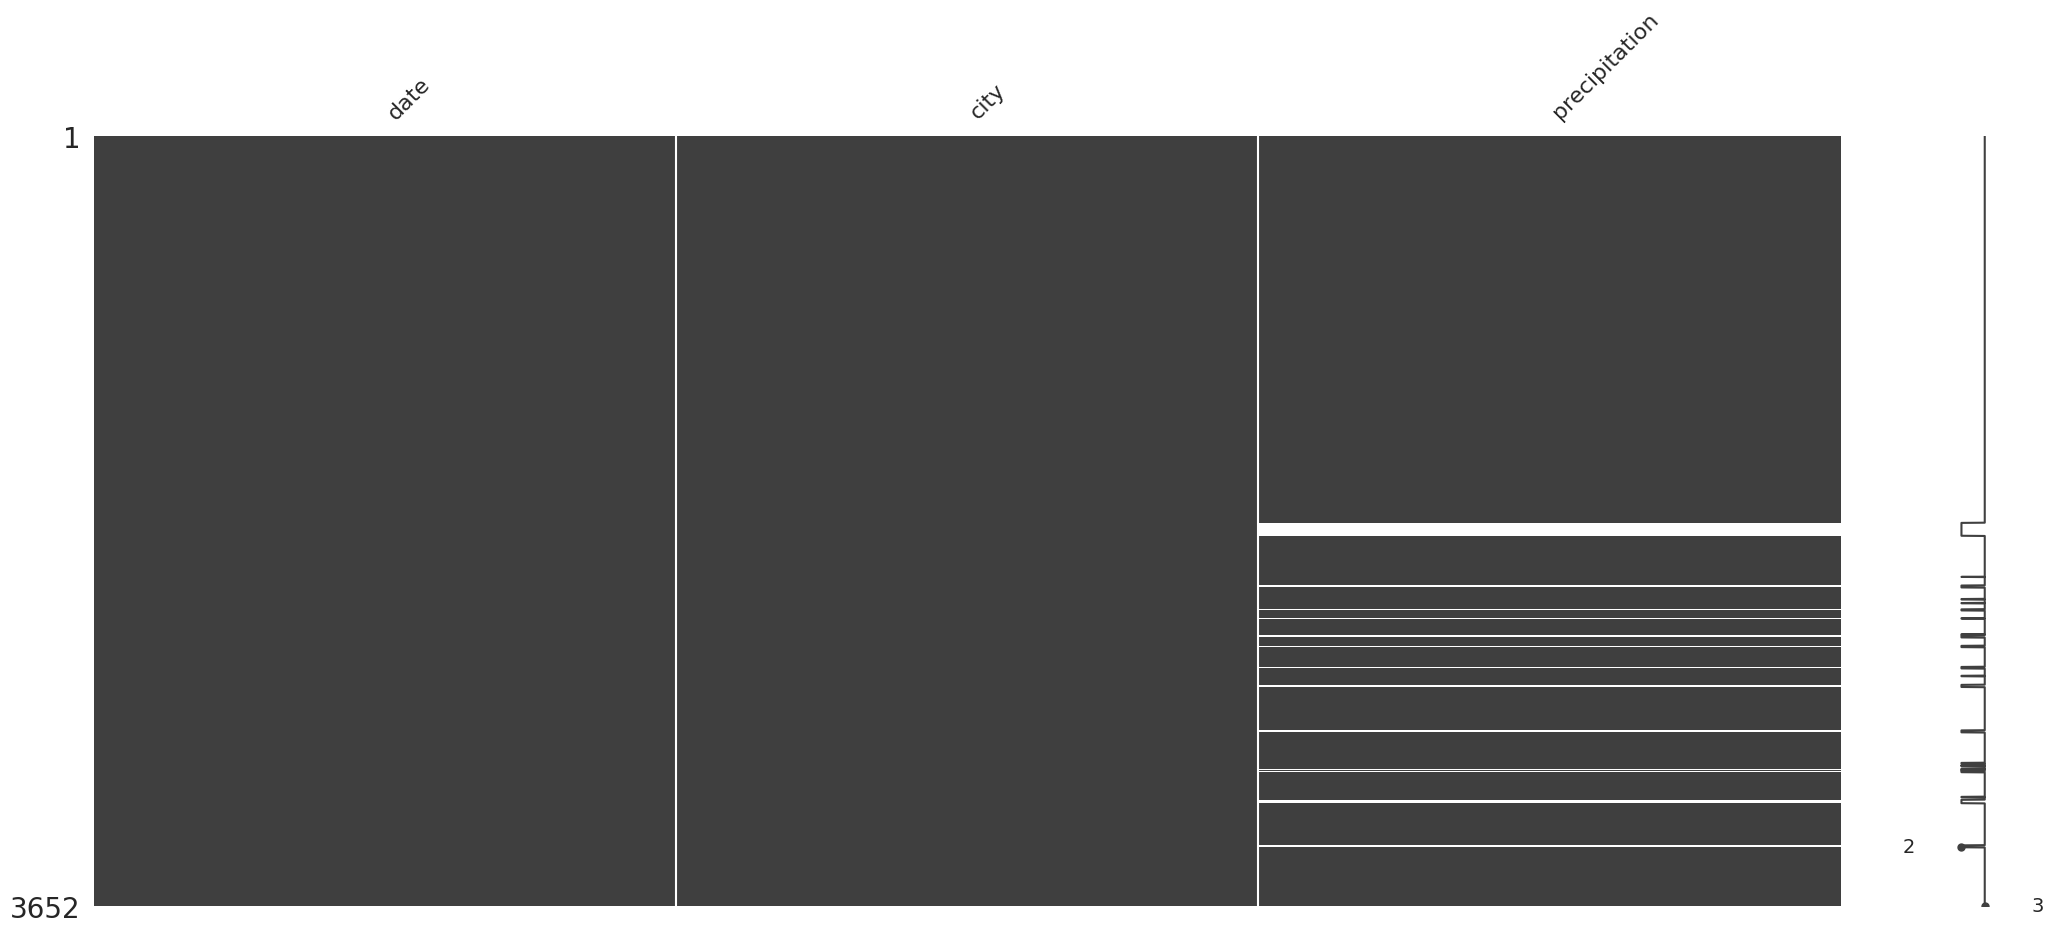

In [49]:
msno.matrix(df)

When we joined the DataFrames using a left join in the St. Louis data set, which is not missing any days, the missing days were created for the Seattle data set. We can see this block of missing values at the beginning of the second half of the precipitation column.

## Impute missing values

We will replace missing values with the mean across years of values on that day. 

We first need to define a column that labels each day by the day of the year: 1, 2, ..., 365.

In [50]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [51]:
df.head(30)

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
5,2018-01-06,STL,0.00,6
6,2018-01-07,STL,0.35,7
7,2018-01-08,STL,0.00,8
8,2018-01-09,STL,0.00,9
9,2018-01-10,STL,0.00,10


We can identify the missing values in our dataframe with `isna` and save the index of each row where precipitation is missing.

In [52]:
indices = np.where(df['precipitation'].isna()==True)[0]

In [53]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

We then need to compute the mean precipitation for each day in Seattle, averaged across years.

There are a couple of things to notice. For instance, 'day_of_year' goes from 1 to 366 because of the leap year. On a leap year, February 29 is added. This causes the enumeration of the days to be misaligned for the year 2020 as shown below. The concern is the extend to which this misaligned may affect the means. Since the difference is only a unit or a day, we do not expect the precipitation mean to substantially change. The rationale is that seasonal, weather, and climate changes occur in longer periods than just one day.

In [54]:
df['day_of_year'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [55]:
pd.DatetimeIndex(df.loc[df['date'] == '2019-03-01', 'date']).day_of_year

Int64Index([60, 60], dtype='int64', name='date')

In [56]:
pd.DatetimeIndex(df.loc[df['date'] == '2020-03-01', 'date']).day_of_year

Int64Index([61, 61], dtype='int64', name='date')

In [57]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

In [58]:
mean_day_precipitation

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


For each missing value, replace it with the mean daily precipitation.

In [59]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

Check that there are no missing values.

In [60]:
df[df['precipitation'].isna()==True]

,date,city,precipitation,day_of_year


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3652 non-null   float64       
 3   day_of_year    3652 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 114.2+ KB


In [62]:
df

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
...,...,...,...,...
3647,2022-12-27,SEA,0.78,361
3648,2022-12-28,SEA,0.40,362
3649,2022-12-29,SEA,0.03,363
3650,2022-12-30,SEA,0.62,364


# Create relevant derived variables as new columns

In order to make visualizations and numerical summaries easier, I added 'month' and 'year' which are derived from 'date'

In [63]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [64]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [65]:
# Sort the DataFrame by date and city
df = df.sort_values(['date', 'city'])


# Export the clean .csv file

In [66]:
df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>